# **Sprawozdanie 2**

**Imie i nazwisko:** Kamil Grzegorzewski 284982

## Zadanie 2 (3p)

Zadanie 2. Wysegmentuj obszar guza mozgu na podanym obrazie

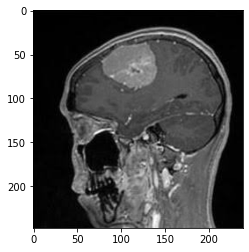

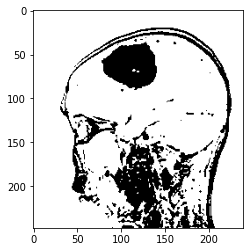

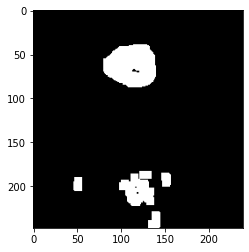

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import morphology
from skimage.morphology import black_tophat, disk
from google.colab.patches import cv2_imshow

image = io.imread('https://i.ibb.co/0F4JM3H/m1-174.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = plt.cm.gray)
plt.show()

(T, threshInv) = cv2.threshold(gray, 105, 255,cv2.THRESH_BINARY_INV)
plt.imshow(threshInv, cmap = plt.cm.gray)
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
closed = cv2.morphologyEx(threshInv, cv2.MORPH_CLOSE, kernel)

closed = cv2.bitwise_not(closed)
plt.imshow(closed, cmap = plt.cm.gray)
plt.show()

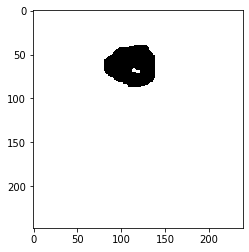

In [ ]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(closed, connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1

min_size = 1200  
removed = np.zeros((output.shape))

for i in range(0, nb_components):
    if sizes[i] >= min_size:
        removed[output == i + 1] = 255

removed = cv2.bitwise_not(removed)

plt.imshow(removed, cmap = plt.cm.gray)
plt.show()

 wnioski i obserwacje:

Przekonwertowałem obraz do skali szarości, następnie przeprowadziłem inverse_thresholding dla wybranego progu. Kolejnym krokiem było zastosowanie operacji morfologicznych w celu usunięcia niechcianej części z obrazu progowanego. Następnie dokonałem negacji wartości pikseli w celu przygotowania obrazu do usunięcia pozostałości, aby otrzymać wysegmentowanego guza. Jestem bardzo zadowolony z końcowego efektu.